# I. Importing the required libraries

In [115]:
## Python
import os
import random
import sys
import warnings
warnings.filterwarnings('ignore')


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)

## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

import sklearn


# % pylab inline

# II. Importing datasets & Labels

In [2]:
# Data Directory
# Please edit according to your directory change.
Ravdess_paths= np.array(("E:/NYU_Classes/Project/Ravdess_Audio_Speech_Actors_01-24/","E:/NYU_Classes/Project/Ravdess_Audio_Song_Actors_01-24/"))
dir_list = os.listdir(Ravdess_paths[0])
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [4]:
# Create DataFrame for Data intel
ravdess_db = pd.DataFrame(columns=['path','source','actor', 'gender', 'emotion','emotion_lb'])
count = 0
for data_path in Ravdess_paths:
    dir_list = os.listdir(data_path)
    dir_list.sort()
    for i in dir_list:
        file_list = os.listdir(data_path + i)
        for f in file_list:
            nm = f.split('.')[0].split('-')
            path = data_path + i + '/' + f
            src = int(nm[1])
            actor = int(nm[-1])
            emotion = int(nm[2])
            source = "Ravdess"

            if int(actor)%2 == 0:
                gender = "female"
            else:
                gender = "male"

            if nm[3] == '01':
                intensity = 0
            else:
                intensity = 1

            if nm[4] == '01':
                statement = 0
            else:
                statement = 1

            if nm[5] == '01':
                repeat = 0
            else:
                repeat = 1

            if emotion == 1:
                lb = "neutral"
            elif emotion == 2:
                lb = "calm"
            elif emotion == 3:
                lb = "happy"
            elif emotion == 4:
                lb = "sad"
            elif emotion == 5:
                lb = "angry"
            elif emotion == 6:
                lb = "fearful"
            elif emotion == 7:
                lb = "disgust"
            elif emotion == 8:
                lb = "surprised"
            else:
                lb = "none"

            ravdess_db.loc[count] = [path,source,actor, gender, emotion,lb]
            count += 1

In [10]:
print (len(ravdess_db))

2452


In [11]:
ravdess_db.sort_values(by='path',inplace=True)
ravdess_db.index =  range(len(ravdess_db.index))
ravdess_db.head()

,path,source,actor,gender,emotion,emotion_lb
0,E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...,Ravdess,1,male,1,neutral
1,E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...,Ravdess,1,male,1,neutral
2,E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...,Ravdess,1,male,1,neutral
3,E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...,Ravdess,1,male,1,neutral
4,E:/NYU_Classes/Project/Ravdess_Audio_Song_Acto...,Ravdess,1,male,2,calm


### Comparing audio features for same sentence by gender 

Ravdess dataset contains audios for same sentence enacted by Male and Female and for various emotions. Here, we compare the frequency-based features for Male vs Female audios.

#### Angry Audio Male vs Female

In [207]:
Male_path = "E:/NYU_Classes/Project/Ravdess_Audio_Speech_Actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
Female_path = "E:/NYU_Classes/Project/Ravdess_Audio_Speech_Actors_01-24/Actor_08/03-01-05-01-01-01-08.wav"

In [319]:
#Male MFCCs
sample, sample_rate = librosa.load(Male_path, res_type='kaiser_fast',sr=22050*2)  
sample, index = librosa.effects.trim(sample,top_db=25)
sample =  scipy.signal.wiener(sample)

male_mfcc = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20)
mean_male_MFCC = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20), axis=0)

S_sample = librosa.feature.melspectrogram(sample, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)
Male_Mel = librosa.amplitude_to_db(S_sample, ref=np.max)


#Female MFCCs
sample, sample_rate = librosa.load(Female_path, res_type='kaiser_fast',sr=22050*2)  
sample, index = librosa.effects.trim(sample,top_db=25)
sample =  scipy.signal.wiener(sample)

female_mfcc = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20)
mean_female_MFCC = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20), axis=0)
S_sample = librosa.feature.melspectrogram(sample, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)
Female_Mel = librosa.amplitude_to_db(S_sample, ref=np.max)


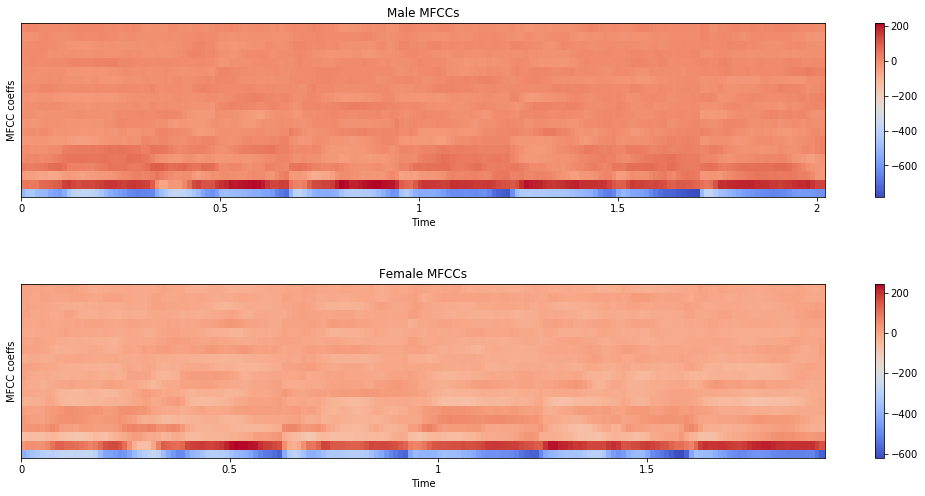

In [296]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
librosa.display.specshow(male_mfcc, sr=sample_rate, x_axis='time')
ax1.set_title('Male MFCCs')
ax1.set_ylabel('MFCC coeffs')
ax1.set_xlabel('Time')
plt.colorbar()


fig.subplots_adjust(hspace=.5)

ax2 = fig.add_subplot(212)
librosa.display.specshow(female_mfcc, sr=sample_rate, x_axis='time')
ax2.set_title('Female MFCCs')
ax2.set_ylabel('MFCC coeffs')
ax2.set_xlabel('Time')

plt.colorbar()

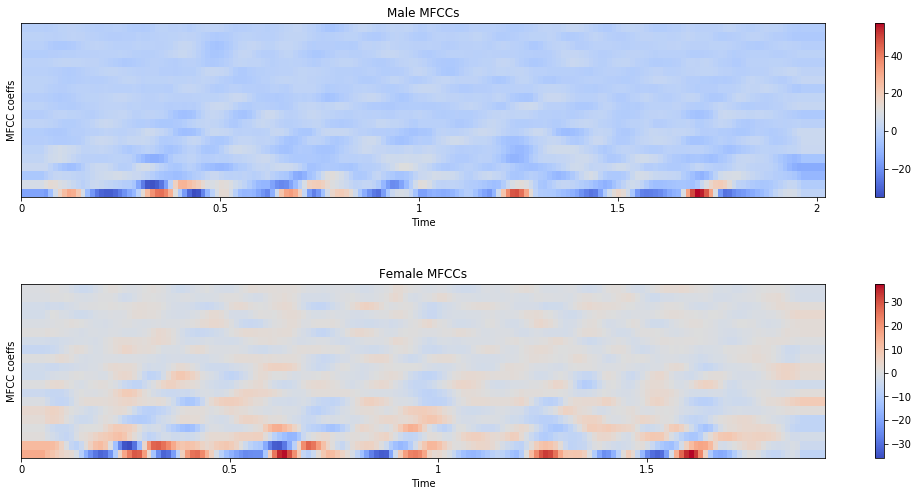

In [297]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
librosa.display.specshow(librosa.feature.delta(male_mfcc,order=1), sr=sample_rate, x_axis='time')
ax1.set_title('Male MFCCs')
ax1.set_ylabel('MFCC coeffs')
ax1.set_xlabel('Time')
plt.colorbar()


fig.subplots_adjust(hspace=.5)

ax2 = fig.add_subplot(212)
librosa.display.specshow(librosa.feature.delta(female_mfcc,order=1), sr=sample_rate, x_axis='time')
ax2.set_title('Female MFCCs')
ax2.set_ylabel('MFCC coeffs')
ax2.set_xlabel('Time')

plt.colorbar()

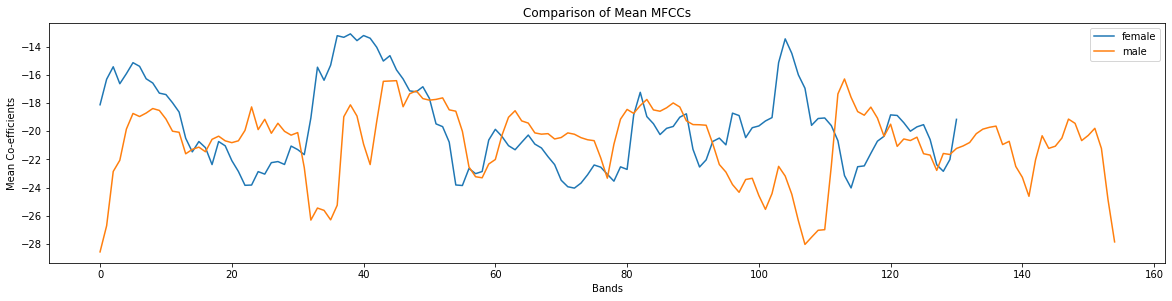

In [216]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(mean_female_MFCC, label='female')
plt.plot(mean_male_MFCC, label='male')
plt.title('Comparison of Mean MFCCs for Angry Audio')
plt.xlabel('Bands')
plt.ylabel('Mean Co-efficients')
plt.legend()

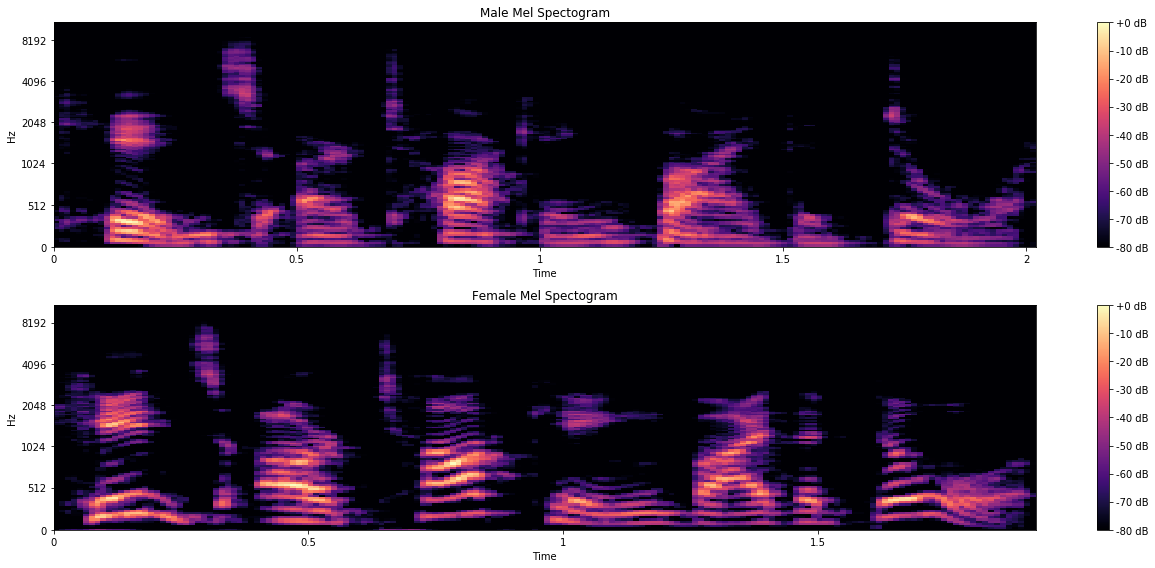

In [320]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
librosa.display.specshow(Male_Mel, sr=sample_rate, x_axis='time', y_axis='mel')
ax1.set_title('Male Mel Spectogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


fig.subplots_adjust(hspace=.5)

ax2 = fig.add_subplot(212)
librosa.display.specshow(Female_Mel,  sr=sample_rate, x_axis='time', y_axis='mel')
ax2.set_title('Female Mel Spectogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()



#### Inference :

For CNN based models, we observe that MFCC and Mel Spectograms could be influential features which can be used to differentiate Gender and Emotions.

#### Comparing audio features for same sentence by same actor for different emotions

In [322]:
Happy_audio = "E:/NYU_Classes/Project/Ravdess_Audio_Speech_Actors_01-24/Actor_08/03-01-03-01-01-01-08.wav"
Sad_audio = "E:/NYU_Classes/Project/Ravdess_Audio_Speech_Actors_01-24/Actor_08/03-01-04-01-01-01-08.wav"

In [323]:
#Happy MFCCs
sample, sample_rate = librosa.load(Happy_audio, res_type='kaiser_fast',sr=22050*2)  
sample, index = librosa.effects.trim(sample,top_db=25)
sample =  scipy.signal.wiener(sample)

Happy_mfcc = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20)
mean_Happy_MFCC = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20), axis=0)

S_sample = librosa.feature.melspectrogram(sample, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)
Happy_Mel = librosa.amplitude_to_db(S_sample, ref=np.max)


#Sad MFCCs
sample, sample_rate = librosa.load(Sad_audio, res_type='kaiser_fast',sr=22050*2)  
sample, index = librosa.effects.trim(sample,top_db=25)
sample =  scipy.signal.wiener(sample)

Sad_mfcc = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20)
mean_Sad_MFCC = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=20), axis=0)
S_sample = librosa.feature.melspectrogram(sample, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)
Sad_Mel = librosa.amplitude_to_db(S_sample, ref=np.max)


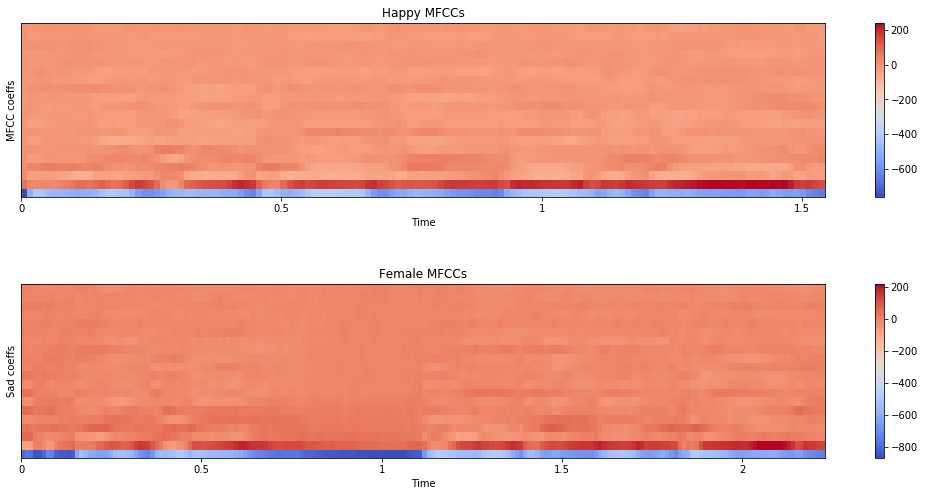

In [324]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
librosa.display.specshow(Happy_mfcc, sr=sample_rate, x_axis='time')
ax1.set_title('Happy MFCCs')
ax1.set_ylabel('MFCC coeffs')
ax1.set_xlabel('Time')
plt.colorbar()


fig.subplots_adjust(hspace=.5)

ax2 = fig.add_subplot(212)
librosa.display.specshow(Sad_mfcc, sr=sample_rate, x_axis='time')
ax2.set_title('Female MFCCs')
ax2.set_ylabel('Sad coeffs')
ax2.set_xlabel('Time')

plt.colorbar()

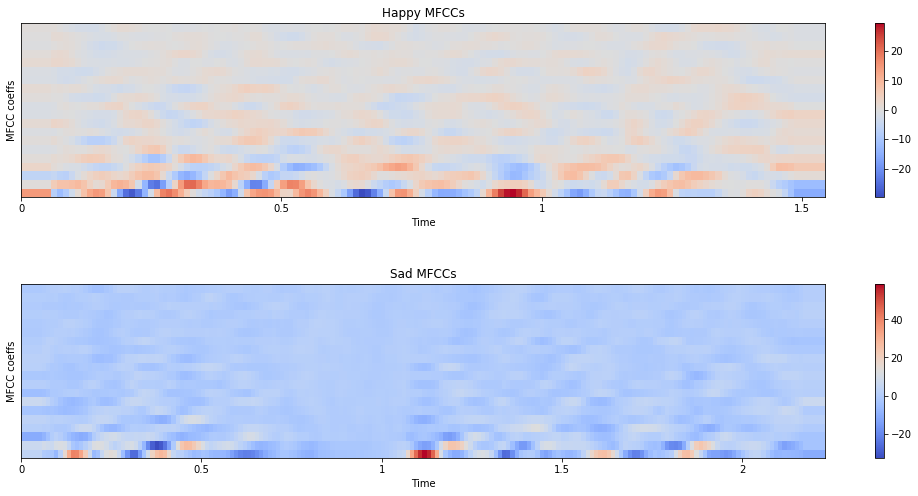

In [325]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
librosa.display.specshow(librosa.feature.delta(Happy_mfcc,order=1), sr=sample_rate, x_axis='time')
ax1.set_title('Happy MFCCs')
ax1.set_ylabel('MFCC coeffs')
ax1.set_xlabel('Time')
plt.colorbar()


fig.subplots_adjust(hspace=.5)

ax2 = fig.add_subplot(212)
librosa.display.specshow(librosa.feature.delta(Sad_mfcc,order=1), sr=sample_rate, x_axis='time')
ax2.set_title('Sad MFCCs')
ax2.set_ylabel('MFCC coeffs')
ax2.set_xlabel('Time')

plt.colorbar()

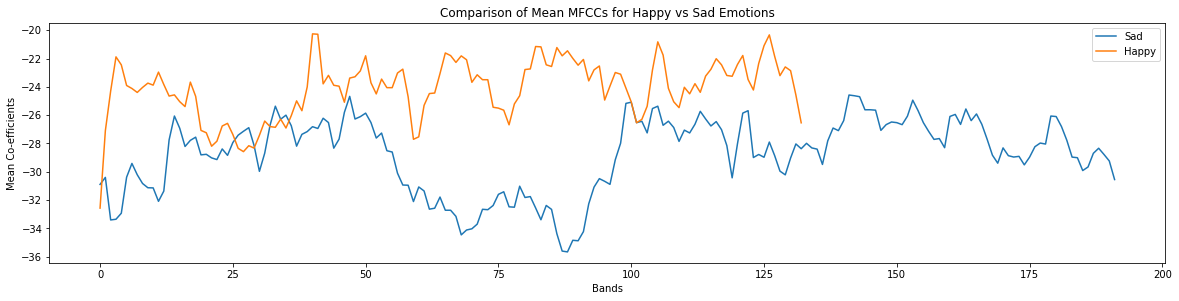

In [326]:
# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(mean_Sad_MFCC, label='Sad')
plt.plot(mean_Happy_MFCC, label='Happy')
plt.title('Comparison of Mean MFCCs for Happy vs Sad Emotions')
plt.xlabel('Bands')
plt.ylabel('Mean Co-efficients')
plt.legend()

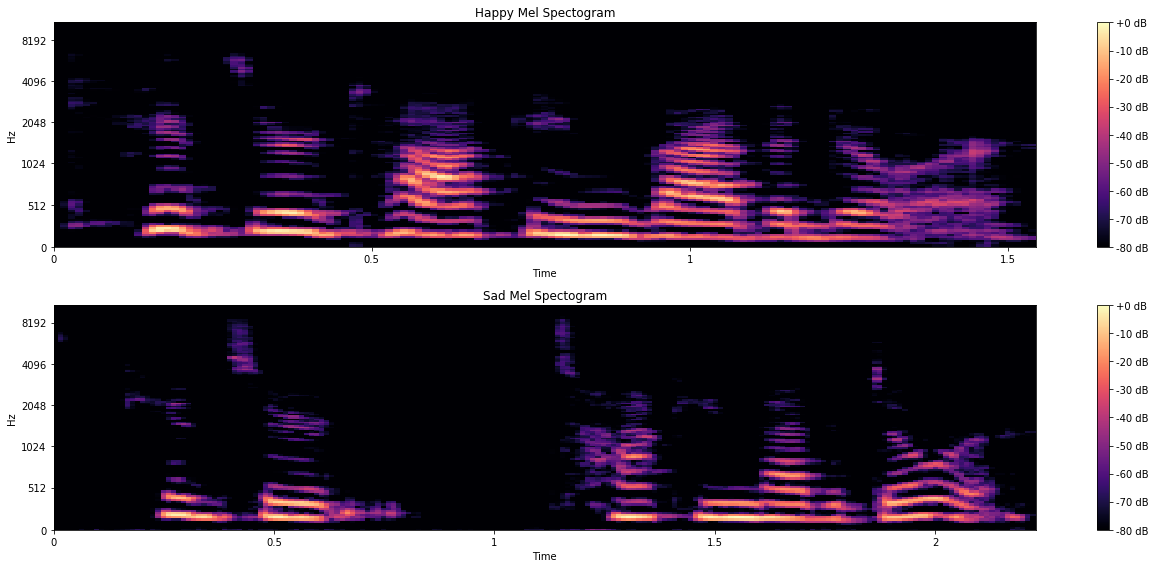

In [328]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(211)
librosa.display.specshow(Happy_Mel, sr=sample_rate, x_axis='time', y_axis='mel')
ax1.set_title('Happy Mel Spectogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


fig.subplots_adjust(hspace=.5)

ax2 = fig.add_subplot(212)
librosa.display.specshow(Sad_Mel,  sr=sample_rate, x_axis='time', y_axis='mel')
ax2.set_title('Sad Mel Spectogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()



### Inference :

For CNN based models, we observe that MFCC and Mel Spectograms could be influential features which can be used to differentiate Gender and Emotions.